# Maximum Drawdowns

The purpose of this analysis is apply the theoretical concept of maximum drawdowns as a measure of investment risk to empirical data. 

Maximum drawdown captures the risk of losing money. It is a popular metric considered, perhaps since it is consistent with many behavioural biases in finance i.e loss aversion.

Python is an efficient tool for: loading data, data cleaning and slicing, data manipulation and data visualisation.

For this analysis, we evaluate a hypothetical buy and hold investment in the S&P500 index for 10 years.



# Import Python modules

In [64]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import matplotlib.pyplot as pt
import datetime

# Load data using pandas data-reader

In [65]:
SP500=wb.DataReader('SPY','yahoo',datetime.date(2010,1,1))['Adj Close']
SP500


Date
2010-01-04     91.087418
2010-01-05     91.328552
2010-01-06     91.392838
2010-01-07     91.778671
2010-01-08     92.084045
                 ...    
2021-01-06    373.549988
2021-01-07    379.100006
2021-01-08    381.260010
2021-01-11    378.690002
2021-01-12    378.769989
Name: Adj Close, Length: 2776, dtype: float64

# Calculate daily returns

In [66]:
SP500['daily returns']=(SP500/SP500.shift(1))-1
SP500['daily returns']

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004222
2010-01-08    0.003327
                ...   
2021-01-06    0.005979
2021-01-07    0.014857
2021-01-08    0.005698
2021-01-11   -0.006741
2021-01-12    0.000211
Name: Adj Close, Length: 2776, dtype: float64

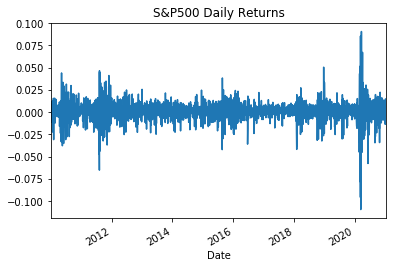

In [67]:
SP500['daily returns'].plot(title='S&P500 Daily Returns')

# Compute drawdowns
1. Construct a wealth index - hypothetical investment of $100 into S&P500 over the last 10 years (buy and hold)
2. Compute previous peaks
3. Compute drawdowns - which is the wealth value as a percentage of the previous peak.

In [68]:
wealth_index=1000*(1+SP500['daily returns']).cumprod()
wealth_index.head()

Date
2010-01-04            NaN
2010-01-05    1002.647288
2010-01-06    1003.353042
2010-01-07    1007.588904
2010-01-08    1010.941443
Name: Adj Close, dtype: float64

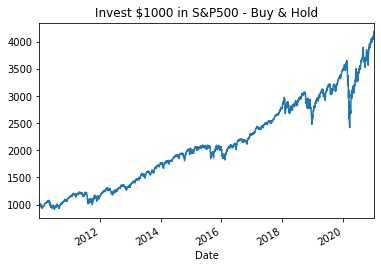

In [69]:
wealth_index.plot.line(title= 'Invest $1000 in S&P500 - Buy & Hold')

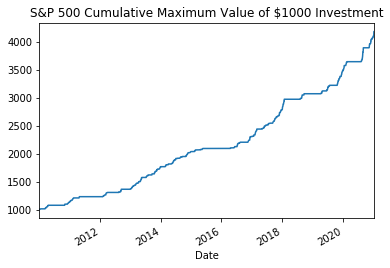

In [70]:
previous_peaks=wealth_index.cummax()
previous_peaks.plot(title='S&P 500 Cumulative Maximum Value of $1000 Investment')

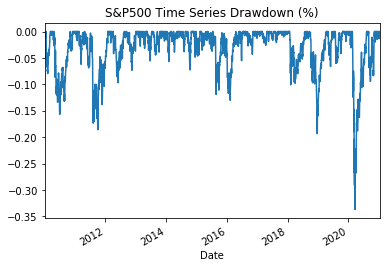

In [71]:
drawdown=(wealth_index-previous_peaks)/previous_peaks
drawdown.plot(title='S&P500 Time Series Drawdown (%)')

In [72]:
drawdown.min()

-0.33717257821190727

In [73]:
#find exact date of minimum
drawdown.idxmin()

Timestamp('2020-03-23 00:00:00')

In [74]:
#take the time series of asset returns and compute a DataFrame containing: the wealth index, previous peaks and drawdowns
def drawdown(return_series:pd.Series):
    """
    takes asset returns and computes a data frame containing wealth index, previous peaks and percentage drawdown
    """
    wealth_index= 1000*(1+return_series).cumprod()
    previous_peaks= wealth_index.cummax()
    drawdowns= (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth":wealth_index,
                         "Peaks":previous_peaks,
                         "Drawdown":drawdowns
                        })

In [75]:
drawdown(SP500['daily returns'])

,Wealth,Peaks,Drawdown
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,1002.647288,1002.647288,0.000000
2010-01-06,1003.353042,1003.353042,0.000000
2010-01-07,1007.588904,1007.588904,0.000000
2010-01-08,1010.941443,1010.941443,0.000000
...,...,...,...
2021-01-06,4101.005360,4104.628441,-0.000883
2021-01-07,4161.936040,4161.936040,0.000000
2021-01-08,4185.649564,4185.649564,0.000000


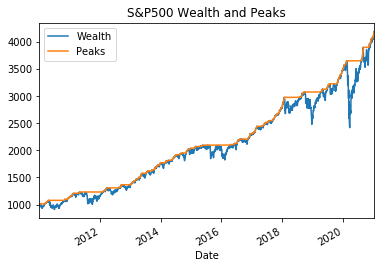

In [76]:
drawdown(SP500['daily returns'])[["Wealth", "Peaks"]].plot(title='S&P500 Wealth and Peaks')

The wealth is overall increasing, and when the S&P500 price drops, the peak stays the same which is what we would expect.